### Going the Extra Mile (or Kilometer)

Where I’m from, we use kilometers. In the US, it’s all miles. When someone says “It’s 3 miles away,” I’m secretly doing math! Wait, is that close? I try to remember: 1 mile is about HOW MANY kilometers.

In the end, I just ask, “How long would it take to walk?” Problem solved!


But let's say someone gave us some (approximate) data that connects the two.

| Miles | Kilometers |
|-------|------------|
| 0     | 0          |
| 7     | 12         |
| 12    | 20         |
| 20    | 32         |
| 30    | 49         |


Try to forget you know how to do this - only looking at the data:

Can you see a *pattern*?

Let's plot it and see what we get!

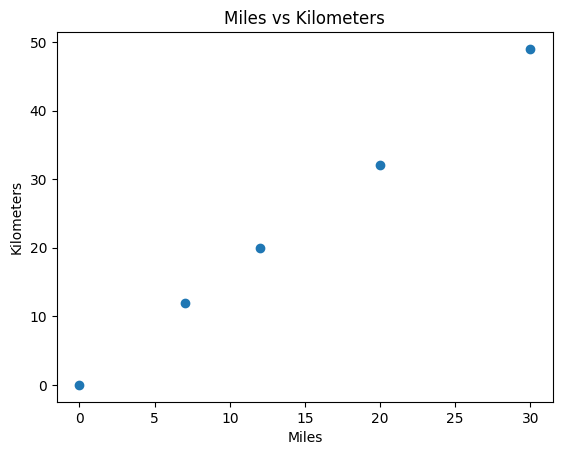

In [1]:
# Import the matplotlib library for plotting
import matplotlib.pyplot as plt

# Data for miles and corresponding kilometers
# Stored in lists
miles = [0, 7, 12, 20, 30]
km = [0, 12, 20, 32, 49]

# Create a scatter plot
plt.scatter(miles, km)

# Add labels and title
plt.xlabel('Miles')
plt.ylabel('Kilometers')
plt.title('Miles vs Kilometers')

# Show the plot
plt.show()

Now do you see a *pattern*?

It looks like a straight line!

In [2]:
import ipywidgets as widgets
from ipywidgets import interactive
import numpy as np
import matplotlib.pyplot as plt

# Rename 'conversion_factor' to represent km per mile

def plot_line(conversion_factor):
    plt.figure(figsize=(8,6)) # Increased figure size to accommodate legend
    plt.scatter(miles, km, label='Data') # Include data points
    x = np.linspace(- 5, 50, 100)
    y = conversion_factor * x
    plt.xlim(-10,60)
    plt.ylim(-10,60)

    line, = plt.plot(x, y, color='red', label=f'Line: y={conversion_factor:.2f}x')
    plt.xlabel('Miles')
    plt.ylabel('Kilometers')
    plt.title('Miles vs Kilometers with Adjustable Conversion Factor')
    plt.axvline(color='black')
    plt.axhline(color='black')
    plt.grid()

    # Move legend outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

interactive(plot_line, conversion_factor=widgets.FloatSlider(value=1 , min=0, max=2, step=0.01, description='Conversion Factor'))

interactive(children=(FloatSlider(value=1.0, description='Conversion Factor', max=2.0, step=0.01), Output()), …

In [3]:
def plot_line(conversion_factor):
    plt.figure(figsize=(8,6)) # Increased figure size to accommodate legend
    x = np.linspace(- 5, 50, 100)
    y = conversion_factor * x
    plt.xlim(-10,60)
    plt.ylim(-10,60)

    line, = plt.plot(x, y, color='red', label=f'Line: y={conversion_factor:.2f}x')
    plt.xlabel('Miles')
    plt.ylabel('Kilometers')
    plt.title('Miles vs Kilometers with Adjustable Conversion Factor')
    plt.axvline(color='black')
    plt.axhline(color='black')
    plt.grid()

    # Move legend outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

interactive(plot_line, conversion_factor=widgets.FloatSlider(value=1 , min=0, max=2, step=0.01, description='Conversion Factor'))

interactive(children=(FloatSlider(value=1.0, description='Conversion Factor', max=2.0, step=0.01), Output()), …

In [ ]:
def plot_line(conversion_factor):
    plt.figure(figsize=(8,6)) # Increased figure size to accommodate legend
    x = np.linspace(- 5, 50, 100)
    y = conversion_factor * x
    plt.xlim(-10,60)
    plt.ylim(-10,60)

    # Calculate total error
    predicted_km = [conversion_factor * m for m in miles]
    total_error = sum(abs(a - p) for a, p in zip(km, predicted_km))

    line, = plt.plot(x, y, color='red', label=f'Line: y={conversion_factor:.2f}x, Total Error: {total_error:.2f}')
    plt.xlabel('Miles')
    plt.ylabel('Kilometers')
    plt.title('Miles vs Kilometers with Adjustable Conversion Factor')
    plt.axvline(color='black')
    plt.axhline(color='black')
    plt.grid()

    # Move legend outside the plot
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()

interactive(plot_line, conversion_factor=widgets.FloatSlider(value=1 , min=0, max=3, step=0.01, description='Conversion Factor'))

interactive(children=(FloatSlider(value=1.0, description='Conversion Factor', max=3.0, step=0.01), Output()), …

### Guessing Without Looking

We used a slider to visually fit a line to the data. We did this by adjusting the line until the gap between the points and the line was as small as possible to our eyes. But what if we couldn't visualize the data at all? How could we find the best fit?


Let's explore how we might do this by using the data itself and measuring how 'wrong' our guesses are. We'll try to find the best fit by minimizing the error, just like a computer would!

Suppose we guess a value for the conversion factor from miles to kilometers. For each guess, we can calculate how far off our *predictions* are from the *actual* data.

This difference is called the **error**.

Let's try a few guesses and see how the error changes!

In [5]:
def check_guess(guess):
  # Make a list to store our predicted kilometers for each data point
  predicted_km = []
  for mile in miles:
      prediction = guess * mile  # multiply miles by our guess
      predicted_km.append(prediction)

  # Now let's see how far off each prediction is from the real value
  errors = []
  for i in range(len(km)):
      error = km[i] - predicted_km[i]  # actual minus predicted
      errors.append(error)

  # Add up all the errors (absolute value, so we don't cancel out)
  total_error = 0

  # @TODO WE CAN REMOVE THE ABS BELOW AND HAVE STUDENTS POINT THIS OUT!
  # for error in errors:
  #     total_error += error
  for error in errors:
      total_error += abs(error)

  print(f"Guess: {guess:.2f}")
  print("Predicted kilometers:", predicted_km)
  print("Actual kilometers:", km)
  print("Errors:", errors)
  print(f"Total error: {total_error:.2f}")

In [6]:
guess = 1 # YOUR GUESS HERE

check_guess(guess)

Guess: 1.00
Predicted kilometers: [0, 7, 12, 20, 30]
Actual kilometers: [0, 12, 20, 32, 49]
Errors: [0, 5, 8, 12, 19]
Total error: 44.00


If our guess isn't perfect, we can try adjusting it and see if the error gets smaller. This is the basic idea behind many machine learning algorithms: try, measure error, and improve!

[1.5        1.51034483 1.52068966 1.53103448 1.54137931 1.55172414
 1.56206897 1.57241379 1.58275862 1.59310345 1.60344828 1.6137931
 1.62413793 1.63448276 1.64482759 1.65517241 1.66551724 1.67586207
 1.6862069  1.69655172 1.70689655 1.71724138 1.72758621 1.73793103
 1.74827586 1.75862069 1.76896552 1.77931034 1.78965517 1.8       ]


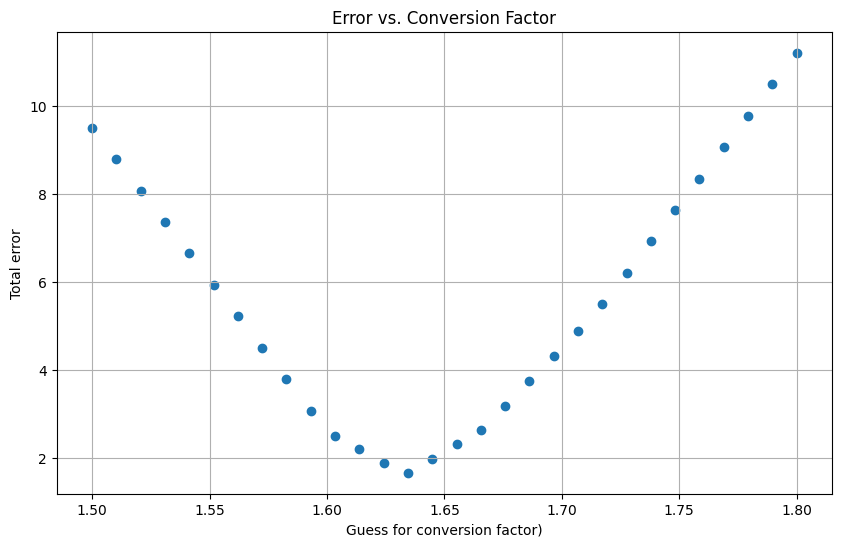

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of possible conversion factors (guesses) to test
guesses = np.linspace(1.5, 1.8, 30) # Adjusted range
print(guesses)
# Initialize a list to store the total error for each guess
errors = []

# Loop through each guess
for g in guesses:
    # Predict the kilometers based on the current guess and the miles data
    predicted_km = [g * m for m in miles]
    # Calculate the total absolute error for the current guess
    # This is the sum of the absolute differences between the actual kilometers and the predicted kilometers
    total_error = sum(abs(a - p) for a, p in zip(km, predicted_km))
    # Add the calculated total error to the errors list
    errors.append(total_error)




# Create a figure for the plot with a specified size
plt.figure(figsize=(10, 6))
plt.grid()
# Plot the relationship between the guesses and their corresponding total errors
plt.scatter(guesses, errors)
# Add labels to the x and y axes
plt.xlabel('Guess for conversion factor)')
plt.ylabel('Total error')
# Add a title to the plot
plt.title('Error vs. Conversion Factor')
# Display the plot
plt.show()

By trying different values and measuring the error, we can find the best value without ever seeing the data visually. This is how computers can 'learn' the best fit: by **minimizing** error!

This process is at the heart of many machine learning techniques.



```
Q. What would happen if we don't use the abs() funtion in the error? Are we still minimizing the error?
```

### What Did We Just Do?

What we just did was 'fit' a line to our data! The conversion factor we found is what we call the **slope** of the line. The slope tells us how much the output changes for each unit of input.

---

Now let's try a similar exercise, but with a new example: converting Fahrenheit to Celsius. Another mental math I try to do.

Suppose we have some data:

| Fahrenheit | Celsius |
|------------|---------|
| 32         | 0       |
| 50         | 10      |
| 68         | 20      |
| 86         | 30      |
| 104        | 40      |

Let's see if we can fit a line to this data with a slider like before!

In [8]:
import ipywidgets as widgets
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

# Data for Fahrenheit and Celsius
fahrenheit = [32, 50, 68, 86, 104]
celsius = [0, 10, 20, 30, 40]

def plot_line(slope):
    plt.figure(figsize=(6,4))
    plt.scatter(fahrenheit, celsius, label='Data')
    x = np.linspace(min(fahrenheit), max(fahrenheit), 100)
    y = slope * x
    plt.plot(x, y, color='red', label=f'Line: y={slope:.2f}x')
    plt.xlabel('Fahrenheit')
    plt.ylabel('Celsius')
    plt.title('Fahrenheit to Celsius')
    plt.legend()
    plt.show()

interactive(plot_line, slope=widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='Slope'))

interactive(children=(FloatSlider(value=0.5, description='Slope', max=1.0, step=0.01), Output()), _dom_classes…

Notice how just changing the slope isn't enough to fit the Celsius to Fahrenheit data perfectly. We need another number to shift the line up or down.

This is called the **intercept**.

In [9]:
def plot_line_with_intercept(slope, intercept):
    plt.figure(figsize=(6,4))
    plt.scatter(fahrenheit, celsius, label='Data')
    x = np.linspace(min(fahrenheit), max(fahrenheit), 100)
    y = slope * x + intercept
    plt.plot(x, y, color='red', label=f'Line: y={slope:.2f}x + {intercept:.2f}')
    plt.xlabel('Fahrenheit')
    plt.ylabel('Celsius')
    plt.title('Fahrenheit to Celsius: Slope and Intercept')
    plt.legend()
    plt.show()

interactive(plot_line_with_intercept,
            slope=widgets.FloatSlider(value=0.5, min=0, max=1, step=0.01, description='Slope'),
            intercept=widgets.FloatSlider(value=-40, min=-60, max=40, step=0.5, description='Intercept'))

interactive(children=(FloatSlider(value=0.5, description='Slope', max=1.0, step=0.01), FloatSlider(value=-40.0…

Both the slope and the intercept are called **parameters** of our model. A parameter is just a number that we can adjust to help our model fit the data better.


---
### What have we seen so far?  

- **Unit conversion**:  
  $$ \text{km} = (\text{conversion factor}) \times \text{miles} $$  

- **Temperature conversion**:  
  $$ \text{Celsius} = (\text{slope}) \times \text{Fahrenheit} + (\text{intercept}) $$  

Both of these are examples of **linear equations**.  

---

<!-- ### General form  

$$ y = mx + b $$

- $m$: slope (how much $y$ changes when $x$ increases by 1)  
- $b$: intercept (the value of $y$ when $x = 0$)  

--- -->

### Our notation going forward  

In machine learning we usually write this as:

$$ y = wx + b $$

- $w$: the **weight** (same role as slope $m$)  
- $b$: the **bias** (same role as intercept)  

For conversions they are known constants, but in real data we must **learn** them from examples. We call $w$ and $b$ the **parameters** of the model.


# WORK IN PROGRESS



---
### Real-World Data: Not Always a Perfect Line

So far, our examples have been *very* neat. But real-world data is often messy!
- Measurements can have errors.
- There might be outliers (weird points).
- The relationship might not be *exactly* a straight line.

Let's see what happens if we add a little "noise" (randomness) to our data.

Try to fit a line visually again. Is it harder? What would you pick as the best line?